In [5]:
# This code has been adoptted, updated, and updated from Sumedha Khatter's masters' thesis at SDSC.
# This is an extention project on analyzing and predicting wildfires at San Diego county. 

from itertools import product
from PIL import Image
import gdal
import numpy as np
import matplotlib.pyplot as plot
from gdalconst import*
from osgeo import ogr
import numpy as np
from sklearn import metrics
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools
import pandas as pd

# random seed
import random
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.linear_model import LogisticRegression

# Pre-processing package
from scipy.stats import skew
from scipy import stats
from sklearn import preprocessing
from scipy.stats import boxcox
import xgboost as xg
%matplotlib inline

# SVM
from sklearn import svm
from sklearn.metrics import roc_auc_score
# TREE
from sklearn import tree
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Grid search
from sklearn.model_selection import GridSearchCV
# Metrics 
from sklearn.metrics import roc_curve, auc
from sklearn. metrics import classification_report 

In [6]:
#4 creating variables for band files taken from the landscape file of 2012
#4 bands include - Elevation, Aspect, Slope, Fuel Model Number

#year 2012
band1_12 = 'band1_.tif'
band2_12 = 'band2_.tif'
band3_12 = 'band3_.tif'
band4_12 = 'band4_.tif'
#new bands vegitation & human distance
#band5_12 ='veg-2012.tif'
band6_12 ='human.tif'

#this file has cumulative fire frequencies from 1992 - 2012
fireFreq = 'fire92_12_.tif'


#opening all the band files using gdal
dataset1_12 = gdal.Open(band1_12, GA_ReadOnly)
dataset2_12 = gdal.Open(band2_12, GA_ReadOnly)
dataset3_12 = gdal.Open(band3_12, GA_ReadOnly)
dataset4_12 = gdal.Open(band4_12, GA_ReadOnly)
#dataset5_12 = gdal.Open(band5_12, GA_ReadOnly)
dataset6_12 = gdal.Open(band6_12, GA_ReadOnly)
dataset_fireFreq = gdal.Open(fireFreq, GA_ReadOnly)

In [7]:
#getting individual bands for 2012
band_fireFreq = dataset_fireFreq.GetRasterBand(1)
band1_12 = dataset1_12.GetRasterBand(1)
band2_12 = dataset2_12.GetRasterBand(1)
band3_12 = dataset3_12.GetRasterBand(1)
band4_12 = dataset4_12.GetRasterBand(1)
#band5_12 = dataset5_12.GetRasterBand(1)
band6_12 = dataset6_12.GetRasterBand(1)

#get data in the numpy arrays for 2012
data_fireFreq =  np.array(band_fireFreq.ReadAsArray(0,0,band_fireFreq.XSize, band_fireFreq.YSize)) 
data1_12 = np.array(band1_12.ReadAsArray())
data2_12 = np.array(band2_12.ReadAsArray(0,0,band2_12.XSize, band2_12.YSize))
data3_12 = np.array(band3_12.ReadAsArray(0,0,band3_12.XSize, band3_12.YSize))
data4_12 = np.array(band4_12.ReadAsArray(0,0,band4_12.XSize, band4_12.YSize))
#data5_12 = np.array(band5_12.ReadAsArray(0,0,band5_12.XSize, band5_12.YSize))
data6_12 = np.array(band6_12.ReadAsArray(0,0,band6_12.XSize, band6_12.YSize))

In [8]:
#Reshaping the arrays

data1_12 = data1_12.flatten()
data2_12 = np.reshape(data2_12, data2_12.size, order='F')
data3_12 = np.reshape(data3_12, data3_12.size, order='F')
data4_12 = np.reshape(data4_12, data4_12.size, order='F')
#data5_12 = np.reshape(data5_12, data5_12.size, order='F')
data6_12 = np.reshape(data6_12, data6_12.size, order='F')
data_fireFreq = np.reshape(data_fireFreq, data_fireFreq.size, order='F')

#Checking the size of veg. and human distance data
#print(np.shape(data5_12))
print(np.shape(data6_12))

(4665108L,)


In [5]:
# Proposed method by Dan to canculate human distance
# Make new array same the same size and shype as data 4_12 -- surafce fuel
# Iterate all the element for each pix -- Calculate distance for nearest human activity

In [46]:
#Creating variables for Fire Parameters

#file for 2013-14 - this file has 1/0 if the fire happened in 2013-2014/ or not
fireParamFile_14 = 'fire2014_.tif'


#opening the files using gdal
fireDataset_14 = gdal.Open(fireParamFile_14, GA_ReadOnly)


#getting the raster band 1 from all the 4 datasets
fireBand1_14 = fireDataset_14.GetRasterBand(1)


#converting the rasterized values in arrays
data5_14 =  np.array(fireBand1_14.ReadAsArray(0,0,fireBand1_14.XSize, fireBand1_14.YSize))


#reshaping the arrays
data5_14 = np.reshape(data5_14, data5_14.size, order='F')

In [47]:
#creating feature vector using complete data
#5 FEATURES-  Fire Frequency, Elevation, Slope, Aspect, Fuel Model Number, Vegetation, Human Distance
data_t = []
data_t.append(data_fireFreq)
data_t.append(data1_12)
data_t.append(data2_12)
data_t.append(data3_12)
data_t.append(data4_12)
#data_t.append(data5_12)
data_t.append(data6_12)
data = np.array(data_t)
print(data.shape)
data = data.T

#feature vector is X
X = data

#target vector is y
y = data5_14


(6L, 4665108L)


[ 1.04602592  0.51769115  0.75527234  0.10901612  1.4597039   2.44448245]


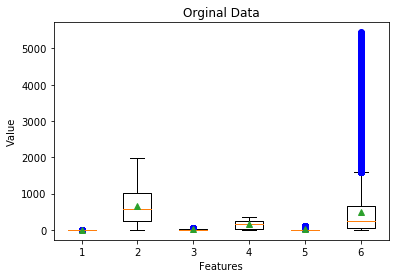

In [48]:
skness = skew(X)
print(skness)

plt.figure()
plt.boxplot(X, 0, 'blue', showmeans=True)
plt.xlabel('Features')
plt.ylabel('Value')
plt.title(r'Orginal Data')
plt.show()

[ 1.04602592  0.51769115  0.75527234  0.10901612  1.4597039   2.44448245]


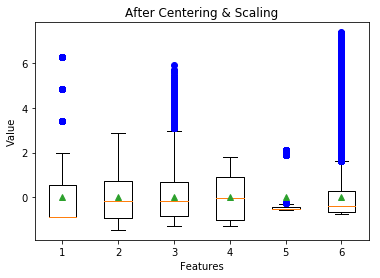

In [50]:
X2 = preprocessing.scale(X)
skness2 = skew(X2)
print(skness2)

plt.figure()
plt.boxplot(X2, 0, 'blue', showmeans=True)
plt.xlabel('Features')
plt.ylabel('Value')
plt.title(r'After Centering & Scaling')
plt.show()

[ 0.22536958 -0.09282306 -0.15296692 -0.5438265   1.3797676   0.77931431]


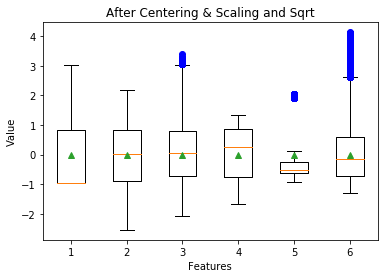

In [51]:
X3 = preprocessing.scale(np.sqrt(X))
skness3 = skew(X3)
print(skness3)

plt.figure()
plt.boxplot(X3, 0, 'blue', showmeans=True)
plt.xlabel('Features')
plt.ylabel('Value')
plt.title(r'After Centering & Scaling and Sqrt')
plt.show()

In [11]:
# Box-cox transformation
#X4 = stats.boxcox(X, lmbda=None, alpha=None)
#skness4 = skew(X4)
#print(skness4)

#plt.figure()
#plt.boxplot(X4, 0, 'blue', showmeans=True)
#plt.xlabel('Features')
#plt.ylabel('Value')
#plt.title(r'After Centering & Scaling and Sqrt')
#plt.show()

In [ ]:
mean = np.mean(data1_12v)
print(mean)

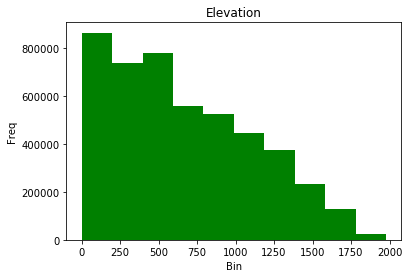

In [13]:
plt.hist(data1_12, facecolor='green')
plt.xlabel('Bin')
plt.ylabel('Freq')
plt.title('Elevation')
plt.show()


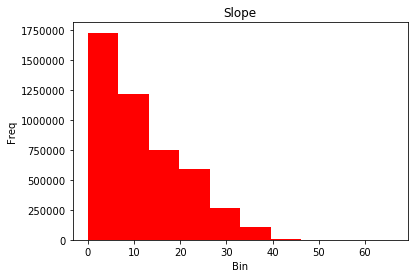

In [14]:
plt.hist(data2_12, facecolor='red')
plt.xlabel('Bin')
plt.ylabel('Freq')
plt.title(r'Slope')
plt.show()

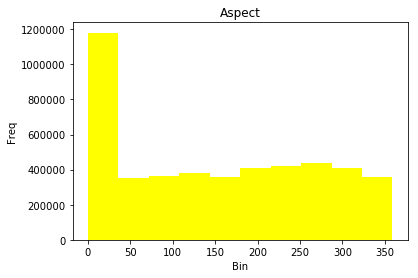

In [15]:
plt.hist(data3_12, facecolor='yellow')
plt.xlabel('Bin')
plt.ylabel('Freq')
plt.title(r'Aspect')
plt.show()

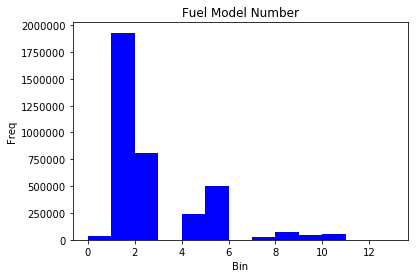

In [33]:
plt.hist(data4_12, facecolor='blue', bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])
plt.xlabel('Bin')
plt.ylabel('Freq')
plt.title(r'Fuel Model Number')
plt.show()

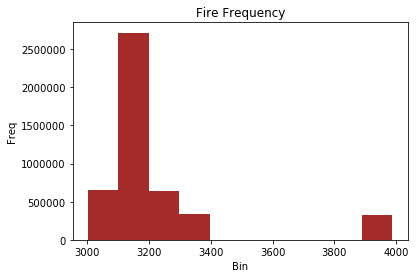

In [17]:
plt.hist(data5_12, facecolor='brown')
plt.xlabel('Bin')
plt.ylabel('Freq')
plt.title(r'Fire Frequency')
plt.show()

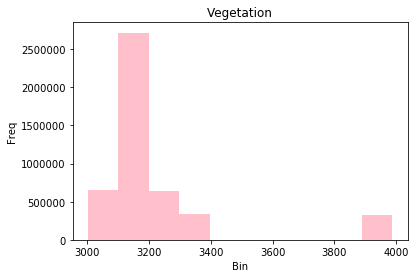

In [22]:
plt.hist(data5_12, facecolor='pink')
plt.xlabel('Bin')
plt.ylabel('Freq')
plt.title(r'Vegetation')
plt.show()

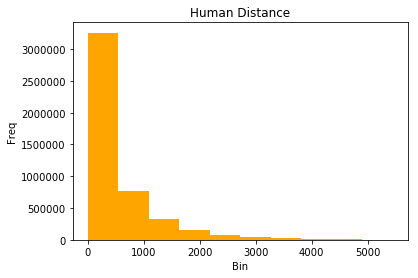

In [19]:
plt.hist(data6_12, facecolor='orange')
plt.xlabel('Bin')
plt.ylabel('Freq')
plt.title(r'Human Distance')
plt.show()

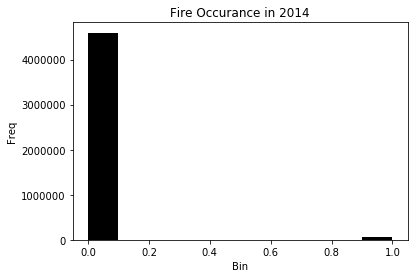

In [20]:
plt.hist(data5_14, facecolor='black')
plt.xlabel('Bin')
plt.ylabel('Freq')
plt.title(r'Fire Occurance in 2014')
plt.show()

In [52]:
#creating test set and training set  using train_test_split
#Split arrays or matrices into random train and test subsets in ratios 80:20

random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)


In [53]:
#using Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_sample(X_train, y_train)

print('Random Under Sampled dataset Shape {}'.format(Counter(y_rus)))

Random Under Sampled dataset Shape Counter({0.0: 54584, 1.0: 54584})


In [19]:
#USING Logistic Regression
logreg = LogisticRegression()
logreg = logreg.fit(X_rus, y_rus)

y_pred = logreg.predict(X_test)
print (classification_report (y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.99      0.60      0.75    919376
        1.0       0.02      0.68      0.05     13646

avg / total       0.98      0.60      0.74    933022



In [14]:
# check the accuracy on the training set/inblanced issue addressed
logreg.score(X_rus, y_rus)

0.63560750403048516

In [15]:
print('Test Set Shape {}'.format(Counter(y_test)))

Test Set Shape Counter({0.0: 919376, 1.0: 13646})


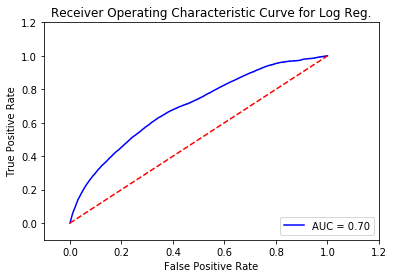

In [16]:
from sklearn.metrics import roc_curve, auc

#finding prediction for class 1 that is class Burnt
y_pred_prob = logreg.predict_proba(X_test)[:,1]
false_positive_rate_1, true_positive_rate_1, thresholds_1 = roc_curve(y_test, y_pred_prob)
roc_auc_1 = auc(false_positive_rate_1, true_positive_rate_1)


plt.title('Receiver Operating Characteristic Curve for Log Reg.')
plt.plot(false_positive_rate_1, true_positive_rate_1, 'b',label='AUC = %0.2f'% roc_auc_1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# ET--correct method  
# evaluate the model by splitting into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#model2 = LogisticRegression()
#model2.fit(X_train, y_train)

# predict class labels for the test set
#predicted = model2.predict(X_test)
#print y_pred

# generate class probabilities
#probs = logreg.predict_proba(X_test)
#print probs

# generate evaluation metrics
#print metrics.accuracy_score(y_test, y_pred)
#print metrics.roc_auc_score(y_test, probs[:, 1])

#print metrics.confusion_matrix(y_test, y_pred)
#print metrics.classification_report(y_test, y_pred)

In [ ]:
# added part by ET ---- not sure if it's accuracy 
result = logreg.score(X_test, y_test)
print("Accuracy: %.3f%%") % (result*100.0)

In [ ]:
# added K-fold by ET
from sklearn import model_selection
num_instances = len(X)
seed = 7
kfold = model_selection.KFold(n_splits=3, random_state=seed)
results = model_selection.cross_val_score(LogisticRegression(), X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0)

In [ ]:
y.mean()

In [36]:
# Fitting the Random Under Sampler'd  training set to classifier
from sklearn import tree
#tree = tree.DecisionTreeClassifier()

# Tuned tree
tree = tree.DecisionTreeClassifier(max_features = 4, max_depth = 20, min_samples_split= 100, min_samples_leaf = 10, criterion = "entropy")
tree.fit(X_rus, y_rus)
y_pred_t = tree.predict(X_test)
print (classification_report (y_test, y_pred_t))
print('')
print('Var Importance:')
print(tree.feature_importances_)

             precision    recall  f1-score   support

        0.0       1.00      0.78      0.88    919376
        1.0       0.05      0.81      0.10     13646

avg / total       0.98      0.78      0.86    933022


Var Importance:
[ 0.10445003  0.07168161  0.17772849  0.11709645  0.09262974  0.24934508
  0.1870686 ]


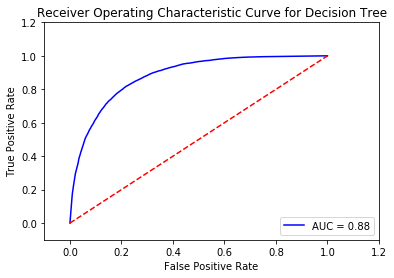

In [88]:
#finding prediction for class 1 that is class Burnt
y_pred_t_prob =tree.predict_proba(X_test)[:,1]
false_positive_rate_1, true_positive_rate_1, thresholds_1 = roc_curve(y_test, y_pred_t_prob)
roc_auc_1 = auc(false_positive_rate_1, true_positive_rate_1)


plt.title('Receiver Operating Characteristic Curve for Decision Tree')
plt.plot(false_positive_rate_1, true_positive_rate_1, 'b',label='AUC = %0.2f'% roc_auc_1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [52]:
#knn
import sklearn.neighbors
#l = np.arange(50)+1
k = np.arange(10)+1
parameters = {'n_neighbors': k}
knn = KNeighborsClassifier(weights='uniform', algorithm='auto', leaf_size = 30, p=2, metric='euclidean', metric_params=None, n_jobs=1)
knn_s = GridSearchCV(knn,parameters,cv=3)
#print(knn_s.best_params_)
knn_s.fit(X_rus, y_rus)
y_pred_knn = knn_s.predict(X_test)
print(knn_s)
print (classification_report (y_test, y_pred_knn))

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
             precision    recall  f1-score   support

        0.0       1.00      0.75      0.86    919376
        1.0       0.05      0.84      0.09     13646

avg / total       0.98      0.75      0.84    933022



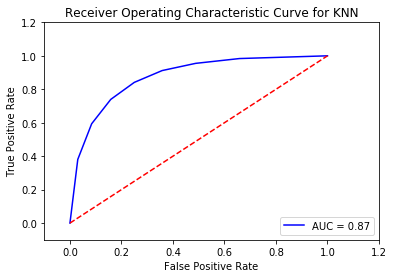

In [53]:
#finding prediction for class 1 that is class Burnt
y_pred_knn_prob = knn_s.predict_proba(X_test)[:,1]
false_positive_rate_1, true_positive_rate_1, thresholds_1 = roc_curve(y_test, y_pred_knn_prob)
roc_auc_1 = auc(false_positive_rate_1, true_positive_rate_1)

plt.title('Receiver Operating Characteristic Curve for KNN')
plt.plot(false_positive_rate_1, true_positive_rate_1, 'b',label='AUC = %0.2f'% roc_auc_1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [35]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_rus, y_rus)
y_pred_nb = gnb.predict(X_test)
print (classification_report (y_test, y_pred_nb))

             precision    recall  f1-score   support

        0.0       0.99      0.36      0.53    919376
        1.0       0.02      0.79      0.04     13646

avg / total       0.98      0.36      0.52    933022



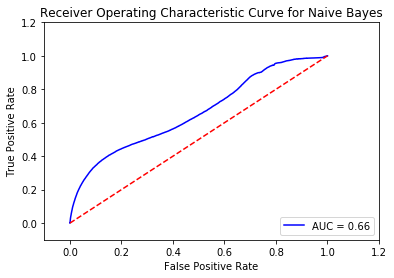

In [36]:
#finding prediction for class 1 that is class Burnt
y_pred_nb_prob = gnb.predict_proba(X_test)[:,1]
false_positive_rate_1, true_positive_rate_1, thresholds_1 = roc_curve(y_test, y_pred_nb_prob)
roc_auc_1 = auc(false_positive_rate_1, true_positive_rate_1)

plt.title('Receiver Operating Characteristic Curve for Naive Bayes')
plt.plot(false_positive_rate_1, true_positive_rate_1, 'b',label='AUC = %0.2f'% roc_auc_1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [37]:
# QDA & LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariances=False, tol=0.0001)
QDA.fit(X_rus, y_rus)
y_pred_q = QDA.predict(X_test)
print (classification_report (y_test, y_pred_q))

             precision    recall  f1-score   support

        0.0       0.99      0.46      0.63    919376
        1.0       0.02      0.82      0.04     13646

avg / total       0.98      0.46      0.62    933022



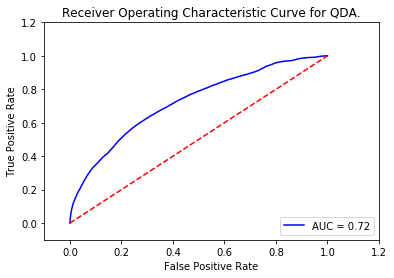

In [38]:
#finding prediction for class 1 that is class Burnt
y_pred_q_prob = QDA.predict_proba(X_test)[:,1]
false_positive_rate_1, true_positive_rate_1, thresholds_1 = roc_curve(y_test, y_pred_q_prob)
roc_auc_1 = auc(false_positive_rate_1, true_positive_rate_1)

plt.title('Receiver Operating Characteristic Curve for QDA.')
plt.plot(false_positive_rate_1, true_positive_rate_1, 'b',label='AUC = %0.2f'% roc_auc_1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=None, n_estimators=100, learning_rate=1, algorithm='SAMME.R', random_state=None)
ada.fit(X_rus, y_rus)   
y_pred_ada = ada.predict(X_test)
print (classification_report (y_test, y_pred_ada))

             precision    recall  f1-score   support

        0.0       0.99      0.70      0.82    919376
        1.0       0.04      0.74      0.07     13646

avg / total       0.98      0.71      0.81    933022



In [75]:
print(ada.feature_importances_)

[ 0.07  0.12  0.08  0.06  0.15  0.43  0.09]


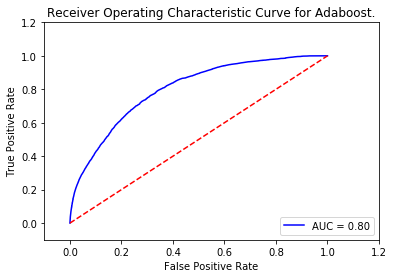

In [40]:
#finding prediction for class 1 that is class Burnt
y_pred_ada_prob = ada.predict_proba(X_test)[:,1]
false_positive_rate_1, true_positive_rate_1, thresholds_1 = roc_curve(y_test, y_pred_ada_prob)
roc_auc_1 = auc(false_positive_rate_1, true_positive_rate_1)

plt.title('Receiver Operating Characteristic Curve for Adaboost.')
plt.plot(false_positive_rate_1, true_positive_rate_1, 'b',label='AUC = %0.2f'% roc_auc_1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
# neural network
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(210, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', 
learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, 
tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
validation_fraction=0.1, beta_1=0.5, beta_2=0.999, epsilon=1e-08)

nn.fit(X_rus, y_rus)   
y_pred_n = nn.predict(X_test)
print (classification_report (y_test, y_pred_n))

             precision    recall  f1-score   support

        0.0       1.00      0.80      0.89    919376
        1.0       0.05      0.76      0.10     13646

avg / total       0.98      0.80      0.88    933022



In [ ]:

nn = MLPClassifier()
parameters={
'learning_rate': ["constant", "invscaling", "adaptive"],
'hidden_layer_sizes': [(200,1), (200,2), (200,3)],
'alpha': [10.0 ** -np.arange(1, 5)],
'activation': ["logistic", "relu", "Tanh"]
}

clf = GridSearchCV(nn,param_grid=parameters,n_jobs=-1,verbose=2)

clf.fit(X_rus, y_rus)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


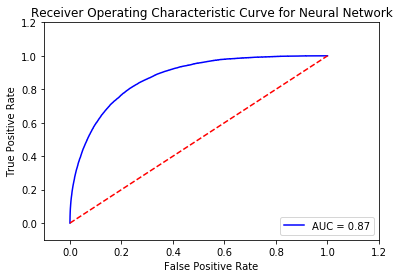

In [30]:
#finding prediction for class 1 that is class Burnt
y_pred_n_prob = nn.predict_proba(X_test)[:,1]
false_positive_rate_1, true_positive_rate_1, thresholds_1 = roc_curve(y_test, y_pred_n_prob)
roc_auc_1 = auc(false_positive_rate_1, true_positive_rate_1)

plt.title('Receiver Operating Characteristic Curve for Neural Network')
plt.plot(false_positive_rate_1, true_positive_rate_1, 'b',label='AUC = %0.2f'% roc_auc_1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Gradient Boosting via search on grid
from sklearn.ensemble import GradientBoostingClassifier
param_test1 = {'n_estimators':range(10,130,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,
                                                               max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_rus, y_rus)
y_pred_gsearch = gsearch1.predict(X_test)
print (classification_report (y_test, y_pred_gsearch))

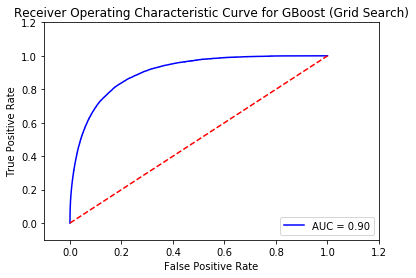

In [16]:
#finding prediction for class 1 that is class Burnt
y_pred_gsearch_prob = gsearch1.predict_proba(X_test)[:,1]
false_positive_rate_1, true_positive_rate_1, thresholds_1 = roc_curve(y_test, y_pred_gsearch_prob)
roc_auc_1 = auc(false_positive_rate_1, true_positive_rate_1)

plt.title('Receiver Operating Characteristic Curve for GBoost (Grid Search)')
plt.plot(false_positive_rate_1, true_positive_rate_1, 'b',label='AUC = %0.2f'% roc_auc_1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# SVM
#using Random Under Sampling
#rus = RandomUnderSampler(random_state=42)
#X_rus, y_rus = rus.fit_sample(X_train, y_train)
#print('Random Under Sampled dataset Shape {}'.format(Counter(y_rus)))
#logreg = logreg.fit(X_rus, y_rus)
#y_pred = logreg.predict(X_test)
#logreg.score(X_rus, y_rus)
from sklearn.model_selection import GridSearchCV
from sklearn import svm
# let's create an SVM model --- ERROR
clf = svm.SVC(kernel='linear', probability=True)
#clf.fit(X_rus, y_rus)  
#SVC(kernel='poly', C=1, gamma=1,probability=True)

# Set the parameters by cross-validation
tuned_parameters = [{'C': [1, 10, 100],'gamma': [1, 10]}]
clf = GridSearchCV(clf, tuned_parameters)
clf.fit(X_rus, y_rus)
y_pred.svm = clf.predict(X_test)

In [ ]:
# KERNEL is Linear
#model_l = svm.SVC(kernel='poly', C=1, gamma=1, probability=True) 
#model_l.fit(X_rus, y_rus)
#model_l.score(X_rus, y_rus)
#predicted_l= model_l.predict(X_test)


# KERNEL is RBF
#model = svm.SVC(kernel='rbf', C=1, gamma=1, probability=True) 
#model.fit(X_rus, y_rus)
#model.score(X_rus, y_rus)
#Predict Output
#predicted= model.predict(X_test)

In [ ]:
#finding prediction for class 1 that is class Burnt
predicted_prob = model_l.predict_proba(X_test)[:,1]
false_positive_rate_1, true_positive_rate_1, thresholds_1 = roc_curve(y_test, predicted_prob)
roc_auc_1 = auc(false_positive_rate_1, true_positive_rate_1)

plt.title('Receiver Operating Characteristic Curve for SVM Model')
plt.plot(false_positive_rate_1, true_positive_rate_1, 'b',label='AUC = %0.2f'% roc_auc_1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [54]:
## 1
from sklearn.ensemble import RandomForestClassifier
#Fitting the Random Under Sampler'd  training set to classifier
classifier_original = RandomForestClassifier()
classifier_original.fit(X_rus, y_rus)

y_predict_test = classifier_original.predict(X_test)

In [55]:
## 2
#using Grid Search CV
from time import time

param_grid = {"n_estimators":[20,30,40,50,60,70,80, 90, 100]
              }

# run grid search
grid_search = GridSearchCV(classifier_original, param_grid=param_grid)
start = time()
grid_search.fit(X_rus, y_rus)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))

GridSearchCV took 270.58 seconds for 9 candidate parameter settings.


In [56]:
## 3
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: 0.801 (std: 0.002)
Parameters: {'n_estimators': 100}

Model with rank: 2
Mean validation score: 0.801 (std: 0.002)
Parameters: {'n_estimators': 90}

Model with rank: 3
Mean validation score: 0.801 (std: 0.002)
Parameters: {'n_estimators': 70}



In [57]:
## 4
#Thus after tuning the decision tree using validation set, we test it on the actual test set. and fit the classfier 
#with the complete training set
classifier_tuned = RandomForestClassifier(n_estimators = 80)
#applying random under sampling on complete training set
classifier_tuned.fit(X_rus, y_rus)
y_pred_tuned = classifier_tuned.predict(X_test)
print (classification_report (y_test, y_pred_tuned))

             precision    recall  f1-score   support

        0.0       1.00      0.79      0.88    919376
        1.0       0.06      0.82      0.10     13646

avg / total       0.98      0.79      0.87    933022



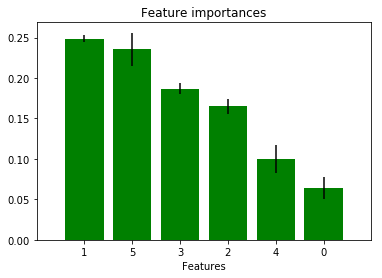

[ 0.06382552  0.24879803  0.1648055   0.18678498  0.10024014  0.23554583]


In [58]:
importances = classifier_tuned.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier_tuned.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlabel('Features')
plt.xlim([-1, X.shape[1]])
plt.show()
print(classifier_tuned.feature_importances_)

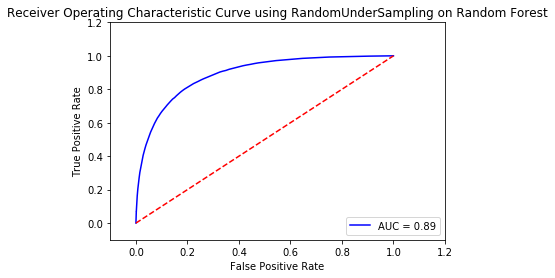

In [59]:
## 5
#finding prediction for class 1 that is class Burnt
y_pred_tuned_prob = classifier_tuned.predict_proba(X_test)[:,1]
false_positive_rate_1, true_positive_rate_1, thresholds_1 = roc_curve(y_test, y_pred_tuned_prob)
roc_auc_1 = auc(false_positive_rate_1, true_positive_rate_1)

plt.title('Receiver Operating Characteristic Curve using RandomUnderSampling on Random Forest')
plt.plot(false_positive_rate_1, true_positive_rate_1, 'b',label='AUC = %0.2f'% roc_auc_1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

(array([ 366109.,  144044.,  102666.,   79025.,   63620.,   52739.,
          42917.,   34109.,   25861.,   21932.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

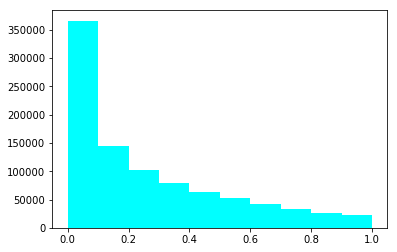

In [17]:
plt.hist(y_pred_tuned_prob, facecolor='cyan', bins = [0, .1,.2,.3,.4,.5,.6,.7,.8,.9,1])

In [60]:
# XGBoost
from xgboost import XGBClassifier
import xgboost as xgb

cv_params = {'max_depth': [7,9,12], 'min_child_weight': [3,5,7]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), cv_params, scoring = 'roc_auc', cv = 3, n_jobs = -1) 
optimized_GBM.fit(X_rus, y_rus)
y_predXGB = optimized_GBM.predict(X_test)
print (classification_report (y_test, y_predXGB))
optimized_GBM.grid_scores_

# make predictions for test data
#y_predXGB = modelXGB.predict(X_test)

             precision    recall  f1-score   support

        0.0       1.00      0.79      0.88    919376
        1.0       0.05      0.81      0.10     13646

avg / total       0.98      0.79      0.87    933022



C:\Users\Ebrahim\Anaconda2\envs\gl-env\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.87871, std: 0.00030, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.87836, std: 0.00043, params: {'max_depth': 7, 'min_child_weight': 5},
 mean: 0.87842, std: 0.00063, params: {'max_depth': 7, 'min_child_weight': 7},
 mean: 0.87957, std: 0.00067, params: {'max_depth': 9, 'min_child_weight': 3},
 mean: 0.87923, std: 0.00036, params: {'max_depth': 9, 'min_child_weight': 5},
 mean: 0.87935, std: 0.00046, params: {'max_depth': 9, 'min_child_weight': 7},
 mean: 0.87841, std: 0.00057, params: {'max_depth': 12, 'min_child_weight': 3},
 mean: 0.87807, std: 0.00070, params: {'max_depth': 12, 'min_child_weight': 5},
 mean: 0.87801, std: 0.00069, params: {'max_depth': 12, 'min_child_weight': 7}]

[ 0.00023521  0.14582089  0.02842236 ...,  0.19384621  0.05252848
  0.00975776]


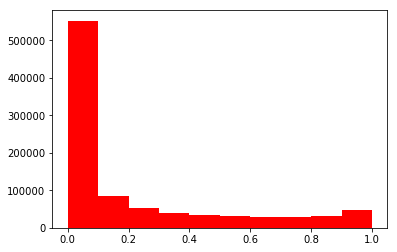

In [51]:
plt.hist(y_predXGB_prob, facecolor='red', bins = [0, .1,.2,.3,.4,.5,.6,.7,.8,.9,1])

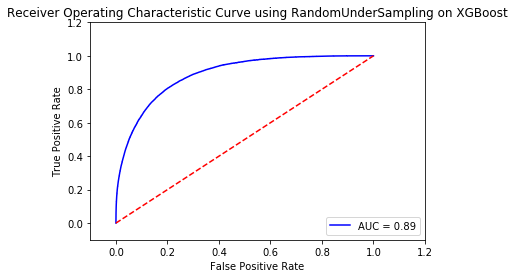

In [61]:
#finding prediction for class 1 that is class Burnt
y_predXGB_prob = optimized_GBM.predict_proba(X_test)[:,1]
false_positive_rate_1, true_positive_rate_1, thresholds_1 = roc_curve(y_test, y_predXGB_prob)
roc_auc_1 = auc(false_positive_rate_1, true_positive_rate_1)

plt.title('Receiver Operating Characteristic Curve using RandomUnderSampling on XGBoost')
plt.plot(false_positive_rate_1, true_positive_rate_1, 'b',label='AUC = %0.2f'% roc_auc_1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#Confusion matrix 
#C is such that C_{i, j} is equal to the number of observations known to be in group i 
#but predicted to be in group j.
#Thus in binary classification, the count of true negatives is C_{0,0}, 
#false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.

class_names = ['Non- burnt', 'burnt']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()